#Binary Classification Chemical Segregation Challenge


###IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from sklearn import preprocessing


##IMPORTING DATASET


In [11]:
X_Train=pd.read_csv('X_Train.csv')
print(X_Train.shape)
X_Train.head()

(3000, 3)


,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [12]:
X_Test=pd.read_csv('X_Test.csv')
print(X_Test.shape)
X_Test.head()

(1000, 3)


,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [66]:
Y_Train=pd.read_csv('Y_Train.csv')
print(Y_Train.shape)
print(Y_Train.head())

(3000, 1)
   label
0      1
1      1
2      1
3      0
4      0


##DATASET VISUALIZATION

In [43]:
#COMBINING ALL DATASET FOR VISUALISATION PURPOSES
Train_Combined=pd.concat([X_Train,Y_Train],axis=1)
Train_Combined

,0,1,2,label
0,-0.016963,0.009560,-0.007977,1
1,-0.014181,0.010228,-0.019374,1
2,-0.008425,0.020159,-0.021007,1
3,0.018285,0.017212,0.021636,0
4,0.009019,0.016591,0.008627,0
...,...,...,...,...
2995,-0.006236,0.016621,-0.020194,1
2996,-0.005948,0.020392,-0.026391,1
2997,0.001208,0.020915,-0.033107,1
2998,0.020875,0.010966,0.022719,0


In [45]:
Final1=Train_Combined[(Train_Combined['label']==1)]
Final0=Train_Combined[(Train_Combined['label']==0)]
Final0.shape

(1509, 4)

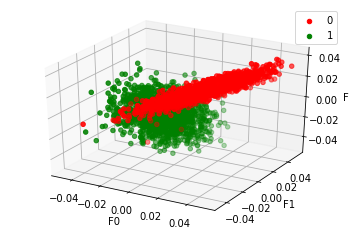

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Final0[0], Final0[1], Final0[2], c='r', marker='o',label='0')
ax.scatter(Final1[0], Final1[1], Final1[2], c='g', marker='o',label='1')
ax.set_xlabel('F0')
ax.set_ylabel('F1')
ax.set_zlabel('F2')
plt.legend()
plt.show()

##NORMALIZING DATASET


In [14]:
d = preprocessing.normalize(X_Train, axis=0)
X_Train = pd.DataFrame(d)
X_Train.head()

,0,1,2
0,-0.016963,0.009560,-0.007977
1,-0.014181,0.010228,-0.019374
2,-0.008425,0.020159,-0.021007
3,0.018285,0.017212,0.021636
4,0.009019,0.016591,0.008627


In [16]:
d = preprocessing.normalize(X_Test, axis=0)
X_Test = pd.DataFrame(d)
X_Test.head()

,0,1,2
0,-0.018615,-0.005761,-0.067349
1,-0.030115,0.031878,-0.011063
2,0.046695,0.042499,0.035957
3,-0.031488,0.023095,-0.014122
4,-0.023398,0.020638,-0.031771


In [61]:
model=lr()
model.fit(X_Train,Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [85]:
Y_predicted=model.predict(X_Test)
Y_predicted.shape

(1000,)

In [86]:
print("The predicted Data and chemical is :")
k=pd.DataFrame(Y_predicted)
a=pd.concat([X_Test,k],axis=1)
a.columns=["f0","f1","f2","Chemical No"]
a

The predicted Data and chemical is :


,f0,f1,f2,Chemical No
0,-0.018615,-0.005761,-0.067349,1
1,-0.030115,0.031878,-0.011063,1
2,0.046695,0.042499,0.035957,0
3,-0.031488,0.023095,-0.014122,1
4,-0.023398,0.020638,-0.031771,1
...,...,...,...,...
995,0.069790,0.066967,0.061835,0
996,0.075887,0.068532,0.049714,0
997,-0.028789,0.020842,-0.021060,1
998,-0.012911,0.040594,-0.026608,1
